<a href="https://colab.research.google.com/github/Fahim-Anin/PyTorch_Fundamentals/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

Build Model
Fit the model to Data(Training)
Saving & Loading a model
Putting it all together



In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.version.__version__

'2.1.0+cu118'

# **Data Preparing & Loading**
create a dataset with linear regression: y=a(weight)x+b(bias)

In [2]:
weight=0.7
bias=0.3
#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) #unsqueeze for extra dimension
Y= weight * X+ bias
#how much coloumn i want
X[:10],Y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(Y)

50

In [4]:
#SPLIT THE DATASET INTO TRAIN AND TEST. WE DONT VALIDATE BECAUSE THE TRAIN DATASET IS TOO SMALL.
#80% FOR TRAIN AND 20% FOR TEST
#scikit_learn_test_split can also be used
train_split=int(0.8*len(X))  #int is for integer value of x that is for actual element for dataset
X_train, Y_train= X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

**To visualize the data in graphical plot here comes the matplotlib.**
We actually train the x value and y value and the model creates the pattern that for the x value there is y value . then with this pattern the X_test value is used for prediction that it gives the actual output y_test value  corresponding each x_test value.

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend. this generates the plot on map
  plt.legend(prop={"size": 10});

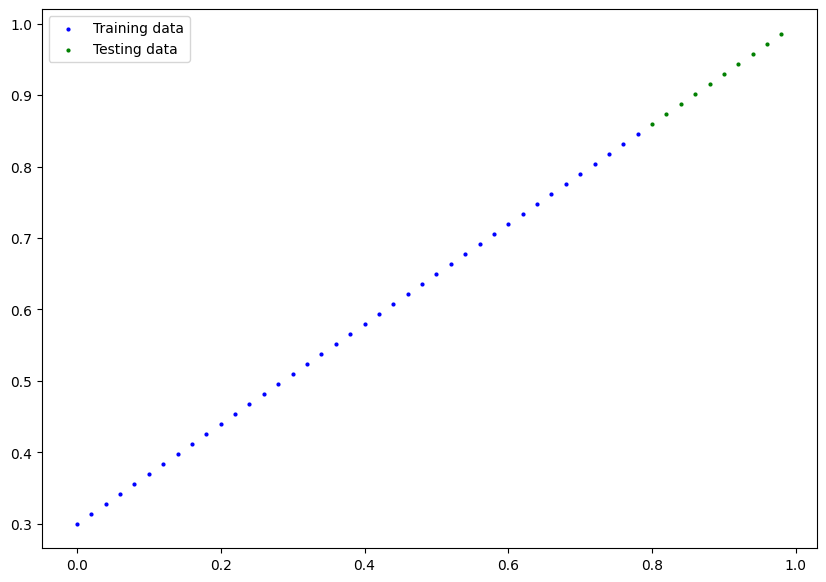

In [6]:
plot_predictions();
#the green are for testing and as there is no prediction so there is no red color and the blue colors are for training .

# **Build model**
1.   Start with random value(weight and bias)
2.   then with train data adjust the random values to better represent the ideal values(the wieght and bias value we used to create for the dataset)

We do it by gradient descent and backpropagation





In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [8]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using **.state_dict()**
this always gives the updated weight and biad value after each loop

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making predictions using
# **torch.inference_mode()**

To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined. then we can compare the prediction with y_test

In [10]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)
y_preds, Y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

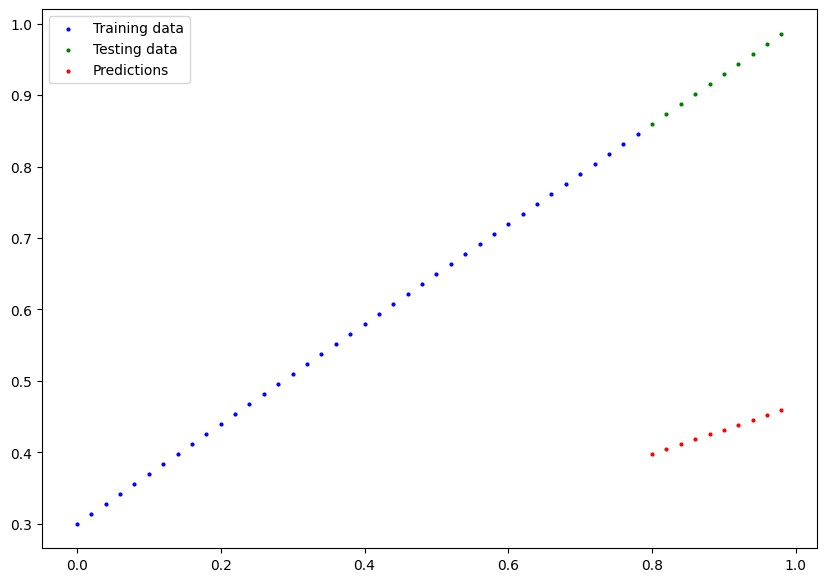

In [11]:
plot_predictions(predictions=y_preds)

# **Train the model.**
# Test the Model
To better representation of Y_preds we need to calculate the loss using loss function
**Optimizer:** Takes the loss of a model and adjust the parameter(weight & biases) to improve the model.


In [12]:
criterion= nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.001)

In [ ]:
torch.manual_seed(42)
epoch=1000

#track the loss values of test and train
epoch_count=[]
train_loss_value=[]
test_loss_value=[]
for i in range(epoch):
  #Set the model to training mood
  model_0.train()
  #forward pass
  y_preds=model_0(X_train)
  train_loss= criterion(y_preds,Y_train)
  #optimier for zero_grad
  optimizer.zero_grad()
  #perform back propagation
  train_loss.backward()
 #update the weight
  optimizer.step()

  #testing
  model_0.eval() #turns of different tools which are not needed during testing
  with torch.inference_mode(): #turns of the gradient_tracking during testing
    test_pred=model_0(X_test)  #forward pass
    test_loss=criterion(test_pred,Y_test)

  #print loss of each 10 epoch
  if epoch%10==0:
    epoch_count.append(i)
    train_loss_value.append(train_loss)
    test_loss_value.append(test_loss)
    print(f"Epoch={i} | Loss={train_loss}|Test_Loss:{test_loss}"  )
    print(model_0.state_dict())

  #print model update parameters(weight and bias after each epoch)



In [29]:
with torch.inference_mode():
  y_new_prediction=model_0(X_test)


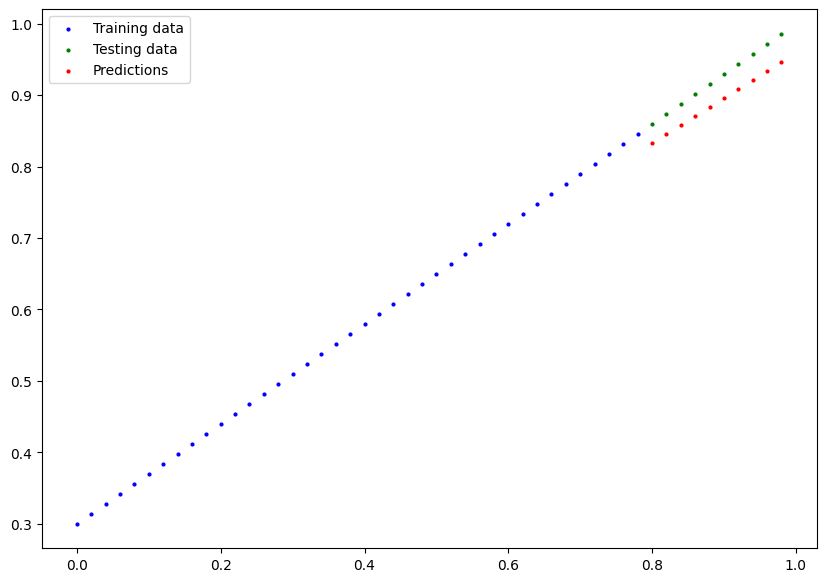

In [26]:
plot_predictions(predictions=y_new_prediction)

In [ ]:
import numpy as np
np.array(torch.tensor(train_loss_value).cpu().numpy()), test_loss_value

In [ ]:
epoch_count, train_loss_value, test_loss_value

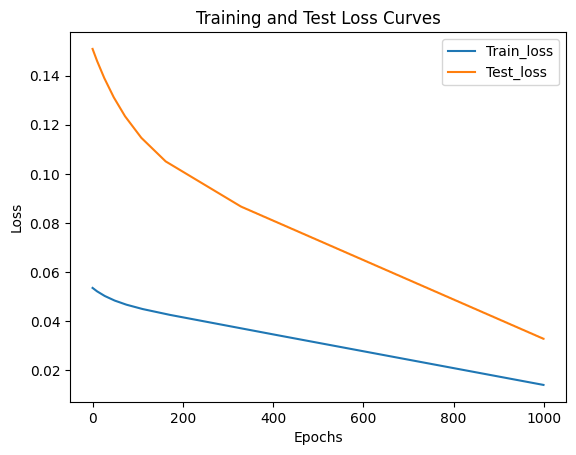

In [32]:
#plot the curve
plt.plot(epoch_count,np.array(torch.tensor(train_loss_value).numpy()), label="Train_loss")
plt.plot(epoch_count, test_loss_value, label="Test_loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

**Save and Load the Model**

In [19]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [20]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Nov 17 20:10 models/01_pytorch_workflow_model_0.pth


In [21]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

# Test the Loaded Model

In [22]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model


In [23]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_new_prediction == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])